<a href="https://colab.research.google.com/github/saharshhhh/DeepLearning/blob/main/Working_With_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

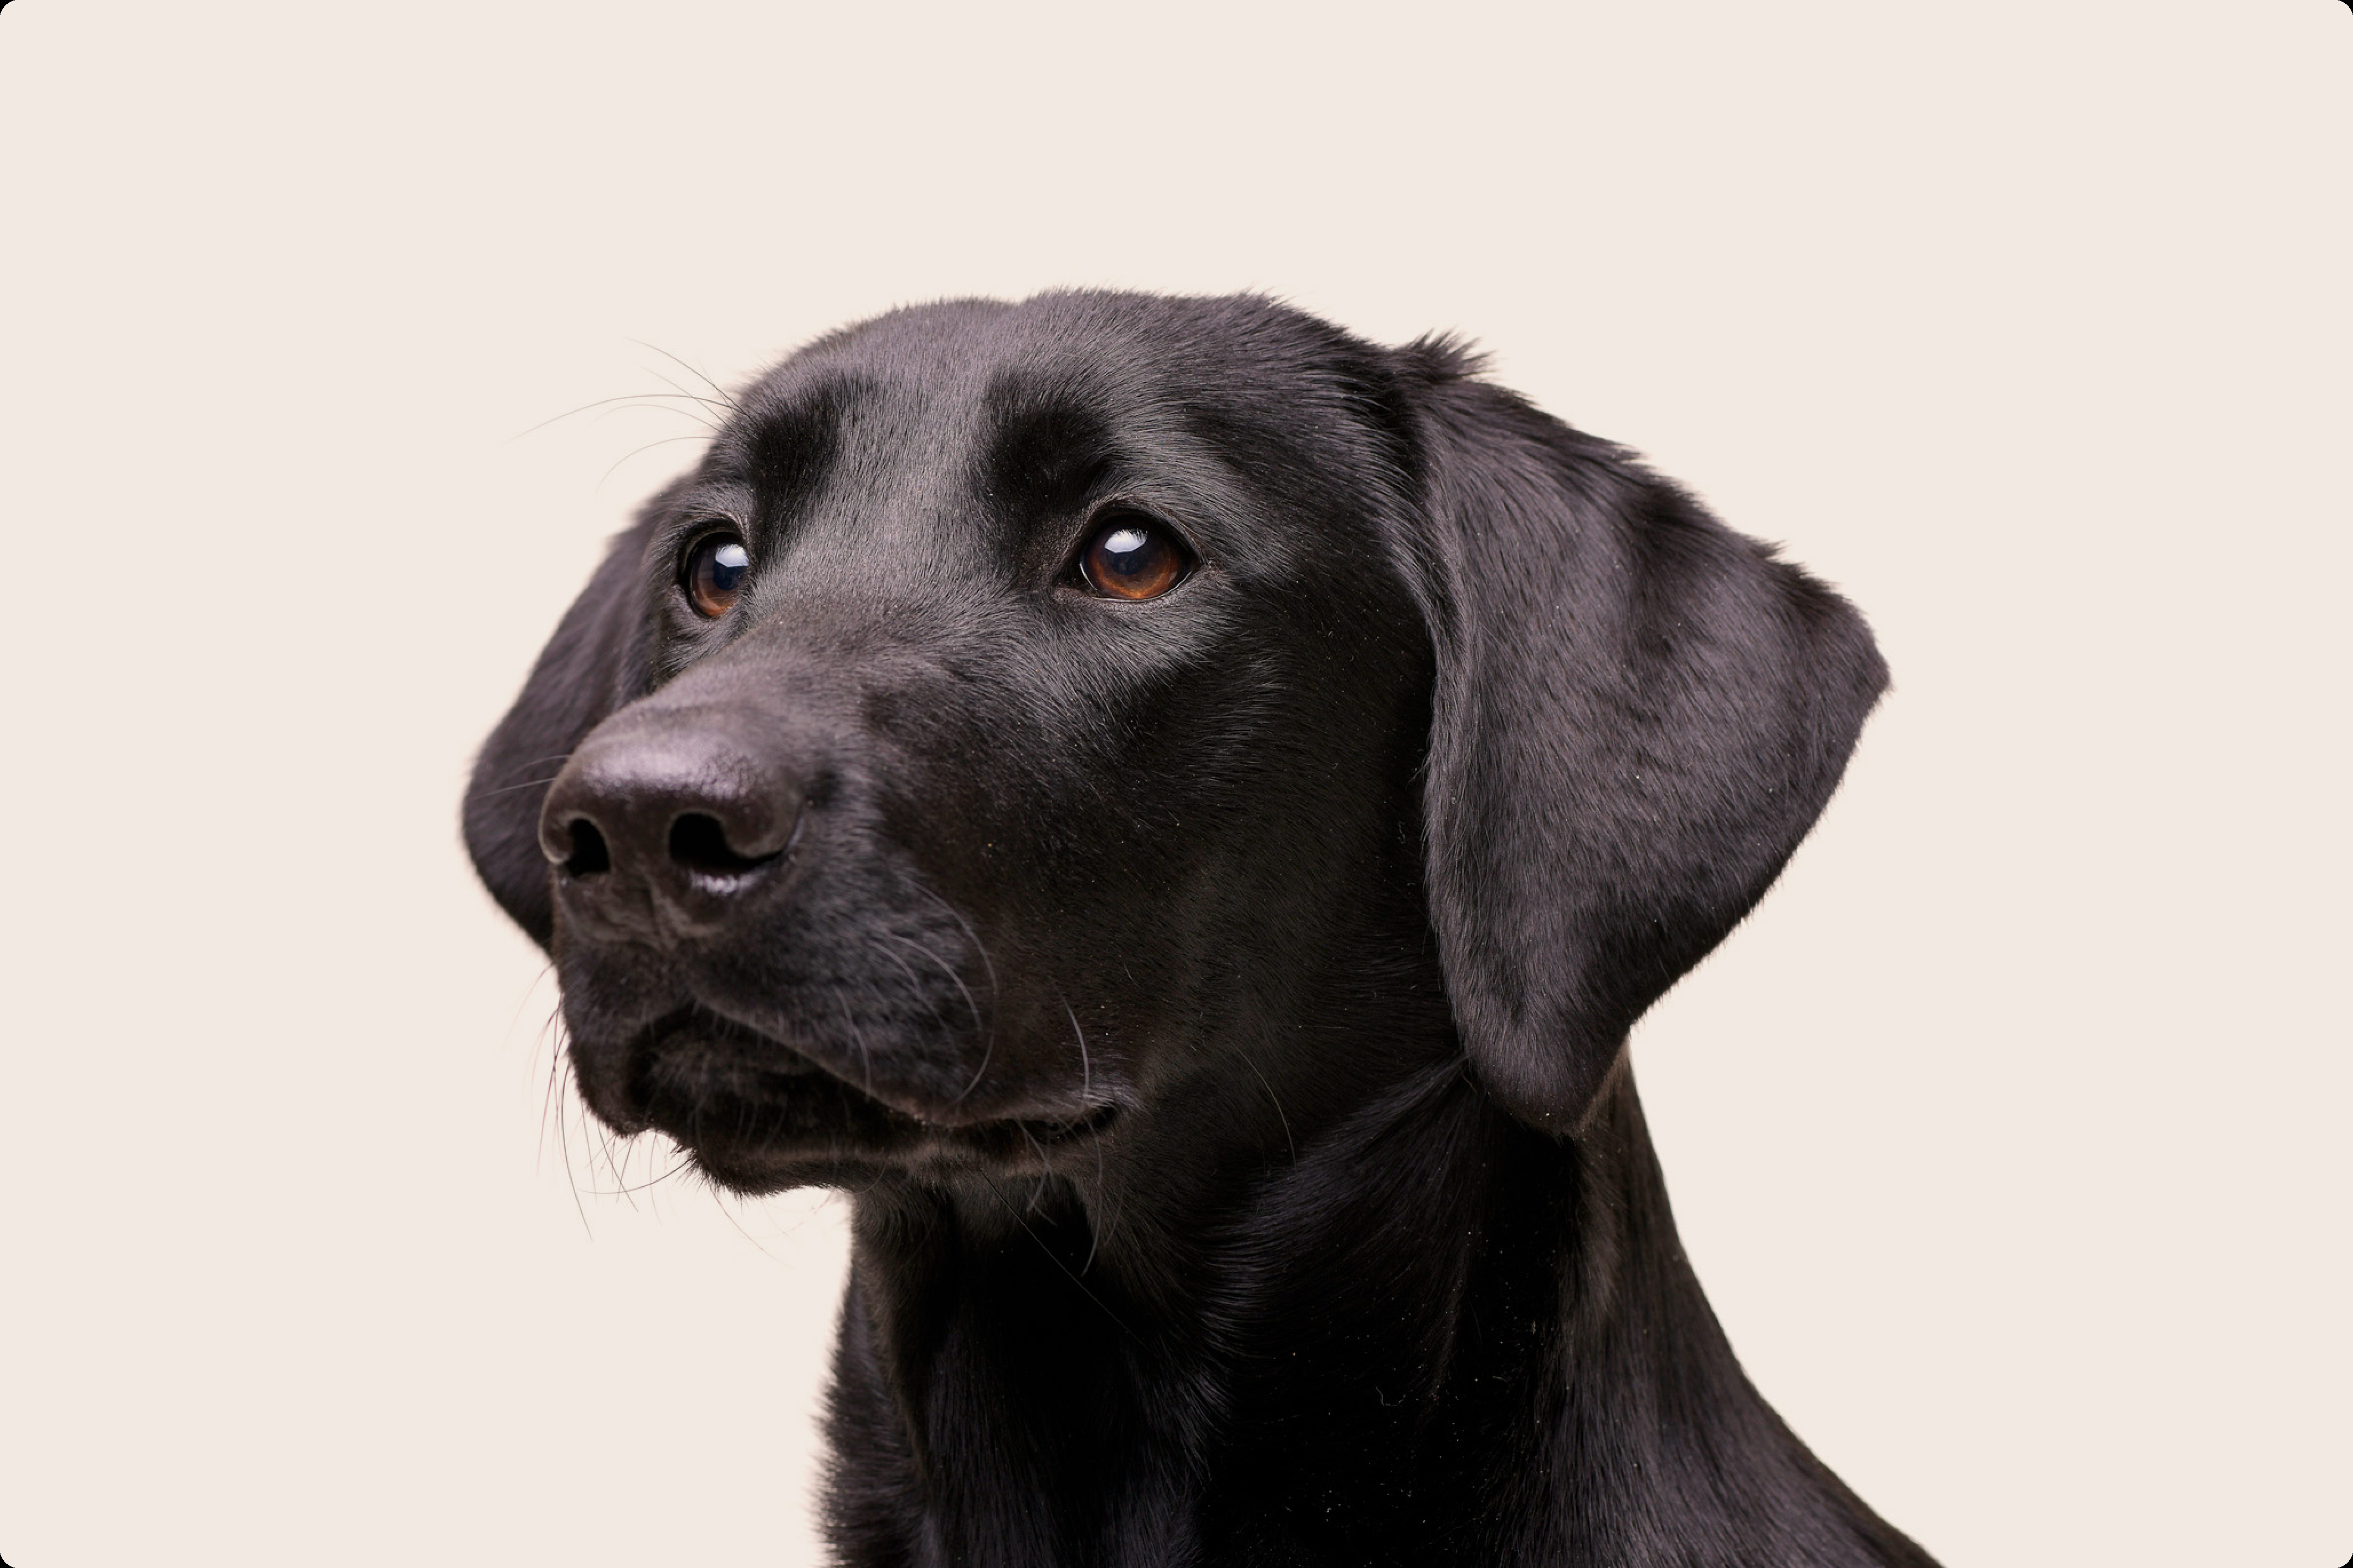

In [1]:
from google.colab.patches import cv2_imshow
import os,json,cv2,random

im=cv2.imread('/content/dog.png')
cv2_imshow(im)

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

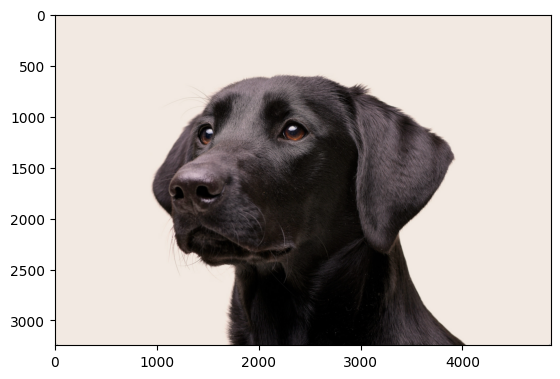

In [3]:
img=mpimg.imread('/content/dog.png')
plt.imshow(img)

In [4]:
img.shape

(3244, 4868, 4)

Text(0.5, 1.0, 'BLUE')

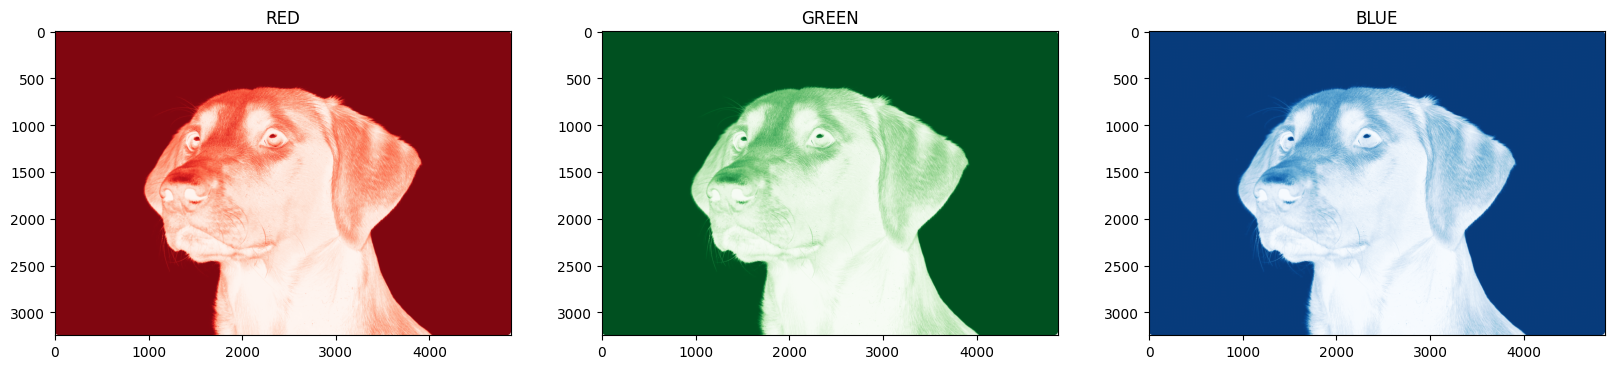

In [5]:
#isolate rgb
r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]

#visualize each channel
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
ax1.imshow(r,cmap='Reds')
ax1.set_title('RED')
ax2.imshow(g,cmap='Greens')
ax2.set_title('GREEN')
ax3.imshow(b,cmap='Blues')
ax3.set_title('BLUE')

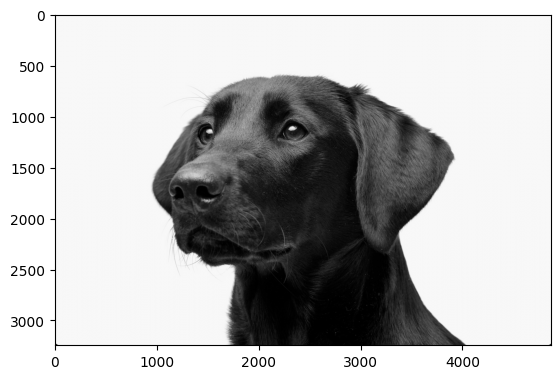

In [6]:
gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

In [7]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
len(X_train),len(X_test)

(60000, 10000)

In [8]:
X_train[0].shape
X_train[0].ndim

2

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
import matplotlib.cm as cm
import numpy as np

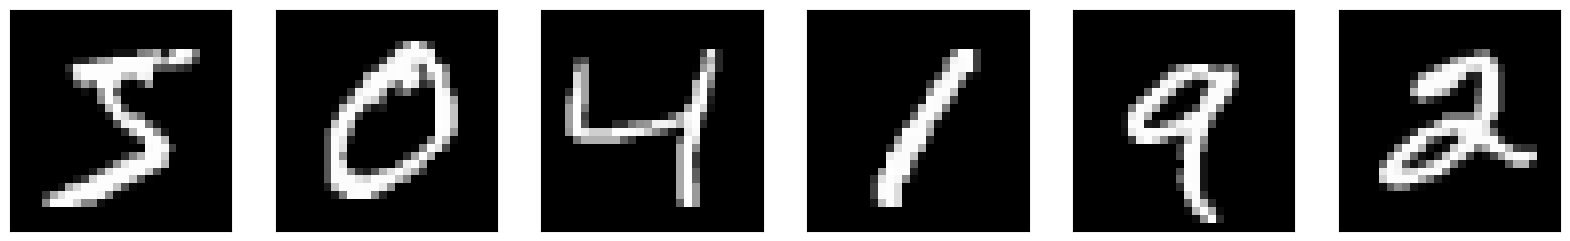

In [11]:
fig=plt.figure(figsize=(20,20))
for i in range(6):
  ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
  ax.imshow(X_train[i],cmap='gray')

<Axes: >

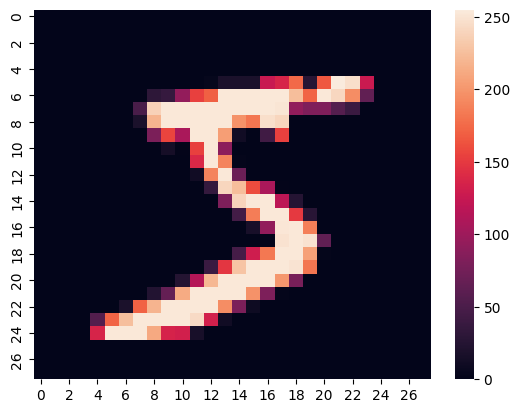

In [12]:
import seaborn as sns
sns.heatmap(X_train[0])

Scaling is done for faster conversions of values for local minima

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [14]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [15]:
X_train[0].max(),X_train[0].min()

(np.float32(1.0), np.float32(0.0))

In [16]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
y_train.ndim

1

In [18]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

RESHAPE

In [19]:
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 824,106 (3.14 MB)

 Trainable params: 824,106 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

we are using relu function to remove negative values, these neagtive values are present due to the updated weight values

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='accuracy',mode='max',verbose=1,patience=3)

In [22]:

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model.weights.best.keras',verbose=1,save_best_only=True)
hist=model.fit(X_train,y_train,batch_size=68,epochs=20,validation_data=(X_test,y_test),callbacks=[checkpointer],verbose=2,shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.04254, saving model to model.weights.best.keras
883/883 - 5s - 6ms/step - accuracy: 0.9949 - loss: 0.0175 - val_accuracy: 0.9890 - val_loss: 0.0425
Epoch 2/20

Epoch 2: val_loss did not improve from 0.04254
883/883 - 8s - 9ms/step - accuracy: 0.9959 - loss: 0.0142 - val_accuracy: 0.9891 - val_loss: 0.0451
Epoch 3/20

Epoch 3: val_loss improved from 0.04254 to 0.04139, saving model to model.weights.best.keras
883/883 - 5s - 5ms/step - accuracy: 0.9958 - loss: 0.0145 - val_accuracy: 0.9898 - val_loss: 0.0414
Epoch 4/20

Epoch 4: val_loss improved from 0.04139 to 0.03725, saving model to model.weights.best.keras
883/883 - 5s - 6ms/step - accuracy: 0.9955 - loss: 0.0162 - val_accuracy: 0.9911 - val_loss: 0.0373
Epoch 5/20

Epoch 5: val_loss did not improve from 0.03725
883/883 - 3s - 4ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9906 - val_loss: 0.0434
Epoch 6/20

Epoch 6: val_loss did not improve from 0.03725
883/883 - 5s

In [27]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0639


[0.05643673613667488, 0.9902999997138977]

In [25]:
model.predict(X_test)[0].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(7)